<h1>Tabla de contenidos 💜<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Qubits-y-estados-cuánticos" data-toc-modified-id="1.-Qubits-y-estados-cuánticos-1">1. Qubits y estados cuánticos</a></span><ul class="toc-item"><li><span><a href="#1.2-Los-átomos-de-la-computación" data-toc-modified-id="1.2-Los-átomos-de-la-computación-1.1">1.2 Los átomos de la computación</a></span><ul class="toc-item"><li><span><a href="#1.-Dividiendo-la-información-en-bits" data-toc-modified-id="1.-Dividiendo-la-información-en-bits-1.1.1">1. Dividiendo la información en bits</a></span></li><li><span><a href="#2.Computación-como-un-diagrama" data-toc-modified-id="2.Computación-como-un-diagrama-1.1.2">2.Computación como un diagrama</a></span></li><li><span><a href="#3.-Creando-nuestro-primer-circuito-cuántico" data-toc-modified-id="3.-Creando-nuestro-primer-circuito-cuántico-1.1.3">3. Creando nuestro primer circuito cuántico</a></span></li><li><span><a href="#4.-Ejemplo:-Creando-un-circuito-Sumador" data-toc-modified-id="4.-Ejemplo:-Creando-un-circuito-Sumador-1.1.4">4. Ejemplo: Creando un circuito Sumador</a></span><ul class="toc-item"><li><span><a href="#4.1-Codificando-el-input" data-toc-modified-id="4.1-Codificando-el-input-1.1.4.1">4.1 Codificando el input</a></span></li><li><span><a href="#4.2-Recordando-como-sumar" data-toc-modified-id="4.2-Recordando-como-sumar-1.1.4.2">4.2 Recordando como sumar</a></span></li><li><span><a href="#4.3-Medio-sumador-en-Qiskit" data-toc-modified-id="4.3-Medio-sumador-en-Qiskit-1.1.4.3">4.3 Medio sumador en Qiskit</a></span></li></ul></li></ul></li><li><span><a href="#1.2-Representando-los-estados-de-nuestros-Qubits" data-toc-modified-id="1.2-Representando-los-estados-de-nuestros-Qubits-1.2">1.2 Representando los estados de nuestros Qubits</a></span></li></ul></li></ul></div>

In [1]:
# Importa Qistkit y verifica la versión
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.3', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.13.1', 'qiskit-aqua': '0.9.1', 'qiskit': '0.26.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# 1. Qubits y estados cuánticos

En las computadoras de superconductores (y en algunos otros métodos) obtenemos nuestros qubits a partir del **spin** de nuestros electrones. Ya que en sí mismo es un sistema de 2 estados que están bien definidos (spin arriba / spin abajo) y esto nos facilita mucho el proceso de cómputo.

Un qubit se suele representar de forma geométrica dentro de una **esfera de Bloch** como la siguiente.

![](https://qiskit.org/textbook/ch-states/images/bloch.png)

Está esfera representa nuestro Qubit como un vector dentro de una esfera que habita dentro de un **espacio de Hilbert** (nos deja trabajar más fácil con algebra lineal y ciertos productos que necesitamos).

Hay que tener presente esta esfera ya que a partir de ella es muy fácil interpretar más adelante como afectan las compuertas cuánticas a nuestros estados.

## 1.2 Los átomos de la computación

Vamos a importar las librerías necesarias para trabajar

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

### 1. Dividiendo la información en bits

Primero, vamos a conceptualizar la idea de bits. Vamos a interpretarlos como si fuesen una especie de alfabeto, pero donde solo tenemos 2 caracteres, '0' y '1'; y a partir de una combinación de ellos podemos representar cualquier pieza de información.

Por ello, nuestros bits no son más que números binarios o base 2, de forma que podemos expresar cualquier cantidad utilizando combinaciones de estos 2 símbolos.

Por ejemplo:

$$9213  = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0)$$

vamos a saltar esta parte que consiste en entender como funciona el sistema binario.

### 2.Computación como un diagrama

Ya se que estemos trabajando con qubits o bits, necesitaremos manipularlos de tal forma que obtengamos una salida dada ciertos valores de entrada. Usualmente facilitamos este proceso al representarlo mediante diagramas, por ejemplo en la versión clásica utilizamos diagramas como el siguiente.

<div>
<img src="https://qiskit.org/textbook/ch-states/images/classical_circuit.png" width="500"/>
</div>

Que al final no hacen más que indicar el orden en el que se tienen que efectuar ciertas operaciones dentro de dispositivos llamados **compuertas lógicas**. Las cuales realizan ciertas manipulaciones de los estados de entrada para obtener un valor de salida.

Tenemos también el análogo cuántico, en diagramas que nos indican también las entradas, las operaciones a realizar y finalmente, las salidas que obtenemos de nuestro **circuito cuántico**.

![](https://qiskit.org/textbook/ch-states/images/quantum_circuit.png)

### 3. Creando nuestro primer circuito cuántico

En un circuito, típicamente tendremos que realizar 3 trabajos.

1. Codificar la entrada.
2. Realizar una computación.
3. Extraer los valores de salida.

Por ahora vamos a concentrarnos en este último.

In [3]:
n = 8 # Definimos n aquí, para establecer la cantidad de bits cuánticos a usar.
n_q = n # Número de qubits
n_b = n # Núero de bits clásicos, donde relizamos las mediciones
qc_output = QuantumCircuit(n_q, n_b) # Creamos un circuito cuántico que recibe n qubits y n bits clásicos
qc_output # Mandamos a llamar a la variable para ver de que tipo es

In [4]:
qc_output.draw() # Si llamamos al método draw nos dibuja el circuito, predeterminadamente en ASCII

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
c: 8/

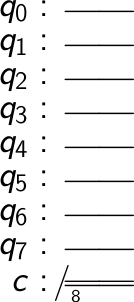

In [5]:
qc_output.draw('latex') # También podemos dibujarlo en LaTeX

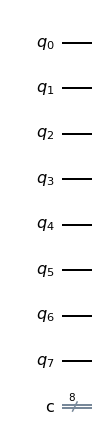

In [6]:
qc_output.draw('mpl') # Si le pasamos 'mpl' para que se vea en un formato bonito

Podemos extraer los outputs de nuestro circuito llamando a la instrucción `measure` en cada uno de nuestros qubits. Vamos a ver como podríamos medir todos los qubits con una sola instrucción usando un for loop.

In [7]:
for j in range(n):
    qc_output.measure(j, j)

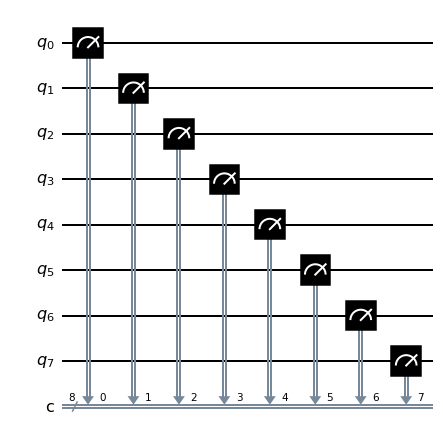

In [8]:
qc_output.draw('mpl')

Esos cuadritos negros con algo similar a un dial es lo que indica que hicimos nuestras mediciones. Como vemos, hicimos corresponder las mediciones del qubit 0 al bit clásico 0, el qc_1 con el c_1 y así con todos.

Nuestro qubits siempre estarán inicializados en el estado 0 siempre y cuando no especifiquemos lo contrario. Si nuestro qubit no recibe ninguna interacción de compuertas entonces siempre esperaremos obtener el mismo estado inicial 0 al realizar la medición.

Algo interesante que podemos hacer es correr nuestro programa varias veces, de forma que obtenemos un conteo de los resultados y hacemos un histograma para tener mayor claridad de las mediciones (ya que muchas veces están sujetas en cierta parte al azar).

Vamos a comenzar con nuestro ejemplo anterior que como sabemos, siempre obtendremos 0's ya que no hemos efectuado ninguna operación.

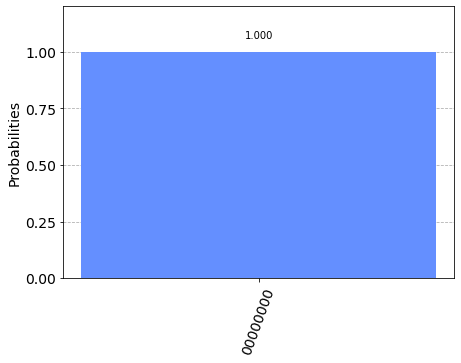

In [10]:
# Creamos una variable donde hacemos una llamada a Aer que es uno de los componentes de Qiskit
# que nos proporciona simuladores de computación cuántica de alto rendimiento con modelos 
# realistas de ruido. (como el que sufre una computadora cuántica al perder información)
# El simulador qasm requiere de mediciones para funcionar correctamente 
sim = Aer.get_backend('qasm_simulator')

# Convertimos nuestro circuito cuántico en un objeto que nuestro backend sabe ejecutar
qobj = assemble(qc_output)

# El resultado sera el método .run() de nuestra simulación pasandole el objeto cuántico qobj
# y obtenemos el resultado con el método .result()
result = sim.run(qobj).result()

# Obtenemos el conteo de resultados
counts = result.get_counts()

# Dibuja el histograma
plot_histogram(counts)

En este caso obtenemos un resultado de 100% en 000...0, ya que no estamos realizando nada sobre nuestro circuito, pero en ejemplos más complejos tendremos distribuciones de probaiblidad más complejas ya que nuestros circuitos estarán sujetos al azar.

Además, en computadores cuánticos reales esto no pasaría, ya que tenemos ruido y ciertos efectos a tener en cuenta como el tiempo de coherencia y de relajación, cosas que por ahora no son de gran importancia, pero hay que tenerlo presente.

Por lo regular nuestro simuladores contienen un número reducido de qubits $(\approx 30)$, pero son herramientas muy importantes, especialmente cuando comenzamos a crear nuestros primeros circuitos.

Cuando queramos probar nuestro circuito en un computador cuántico real solo tendremos que cambiar la instrucción

```Pytho
Aer.get_backend('qasm_simulator')
```

colocando el backend (computador) que nos interesa (y cargando nuestras credenciales de IBM si estamos en local).

### 4. Ejemplo: Creando un circuito Sumador

#### 4.1 Codificando el input

Vamos a ver como podríamos codificar cadenas binarias como nuestro input. Primero, necesitaremos saber que es una compuerta **NOT** , Pauli **X** o **Bit flip**. Esta es la operación más básica que podemos hacer en una computadora. Simplemente invierte el valor de entrada (análogo a una NOT clásica):

$$\begin{aligned}
NOT: \\
0 \rightarrow 1 \\
1 \rightarrow 0
\end{aligned}$$

Rápidamente recordemos que nuestros qubits se pueden representa como **vectores** y usualmente los denotamos con notación de Dirac para hacer más fácil su manipulación. Se representan de la siguiente forma:

$$\begin{aligned}
|0 \rangle =  \begin{pmatrix} 1  \\ 0\end{pmatrix}\\ \\
|1 \rangle = \begin{pmatrix} 0  \\ 1\end{pmatrix}\\
\end{aligned}$$

Y nuestras compuertas se pueden representar como matrices unitarias (mueven la dirección de nuestro vector, pero su magnitud se mantiene).

Entonces, podemos representar nuestra compuerta **X** como una matriz de la siguiente forma:

$$X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

La operación entre vector matriz sería de la siguiente forma:

$$\begin{aligned}
X|0 \rangle =  \begin{pmatrix} 1  \\ 0\end{pmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
&= \begin{pmatrix} 1\cdot 0 + 0 \cdot 1  \\ 1\cdot 1 + 0 \cdot 0 \end{pmatrix}  \\ \\
&=\begin{pmatrix} 0  \\ 1\end{pmatrix}  =|1 \rangle 
\end{aligned}$$

En una esfera de Bloch, nuestra compuerta **X** se puede ver de la siguiente forma (omite el código). Primero visualicemos el estado base 0:

In [11]:
qc = QuantumCircuit(1)
#########################
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

NameError: name 'execute' is not defined

Y después de aplicar la compuerta $X$ se ve así:

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
#########################
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)

Es decir, efectuó un giro de $\pi$ $ rad$ alrededor del eje x.

Y la forma de implementarlo en código es tan sencilla como lo siguiente `.x` :

In [ ]:
# Creamos una variable para las entradas
n = 8
qc_encode = QuantumCircuit(n) # Cricuito cuántico de 8 qubits
qc_encode.x(7) # Aplicamos una compuerta CNOT o Pauli X en el qubit de indice 7
qc_encode.draw('mpl')

De hecho, el circuito anterior lo podemos ver como si fuese todo un registro individual con la cadena $10000000$. Así que ahora podemos hacer un circuito cuántico en donde agreguemos nuestro "registro" de entradas codificadas `qc_encode` y agregarle nuestro circuito anterior de `qc_output` que contenia las mediciones en el ejemplo anterior.

Podemos juntarlos simplemente haciendo `qc_encode + qc_output`

In [ ]:
qc = qc_encode + qc_output
qc.draw('mpl')

Ahora, vamos a realizar el histograma de este nuevo circuito.

In [12]:
qobj = assemble(qc) # Lo hacemos reconocible para el simulador

# Vemos que ya no escribirmos las variables sim y result
# ya que se mantienen guardadas las que hicimos anteriormente
# en caso de reiniciar el notebook tendremos que correr todas las lineas anteriores
counts = sim.run(qobj).result().get_counts()

plot_histogram(counts)

QiskitError: 'No counts for experiment "0"'

Como esperabamos, obtenemos la cadena $10000000$ con gran seguridad. Aquí al ser un simulador idealmente tenemos el 100%, pero en un computador real podríamos tener cierto ruido aunque sería muy pequeño ya que solo usamos una compuerta. También podemos ver que el qubit $n-$ésimo sería el más significativo.

Ahora vamos a codificar otro número:

In [ ]:
n = 8
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(3)
qc_encode.x(5)
qc_encode.x(7)

qc_encode.draw('mpl')

Ya sabemos codificar información ahora vamos a dar el siguiente paso, trabajar con esa entrada y obtener un resultado.

#### 4.2 Recordando como sumar

Resumidamente, vamos a requerir de nuestros bits a sumar y de un bit **carry** o de acarreo para mantener ahí los números que "recorreremos" a la izquierda al sumar $1+1$ en binario.

Lo cual resumimos en una operación XOR (para 2 bits o para el medio sumador) y una AND para leer los datos de salida.

#### 4.3 Medio sumador en Qiskit

Imaginemos el algoritmo que tendremos que realizar para crear un medio sumador:
* Obtenemos las entradas codificadas.
* Hacemos operaciones sobre ellas.
* Realizamos mediciones.
* Obtenemos el resultado.

![](https://qiskit.org/textbook/ch-states/images/half-adder.svg)

De esta forma para obtener diferentes outputs solo tendremos que cambiar la codificación de los outputs y el resto del código se mantendrá igual.

Vamos a codificar nuestros 2 bits a sumar en los qubits 0 y 1. En el ejemplo anterior tenemos el caso de la suma 1+1, y como el resultado es 10 tendremos que separar 2 bits para realizar la lectura, aquí es donde entran en juego `q2` y `q3`

Las lineas punteadas que se ven en el circuito solo son barreras que nos permite separar el circuito para que sea más fácil de visualizar cada una de sus partes, para ello utilizamos el comando `barrier`.

Entonces, sabemos que nuestra implementación para este medio sumador se reduce a construir una XOR, pero utilizando compuertas cuánticas y qubits.

Recordemos la tablita de la XOR:

<div>
<img src="https://i.imgur.com/CxUTWrJ.png" width="500"/>
</div>

Donde vemos que mientras uno de los bits sea 1, entonces la salida es 1; mientras que si ambos son 0 o ambos son 1, entonces obtenemos un 0.

Aquí es de gran utilidad otra compuerta llamada **Controlled not** o **CNOT**, la cuál es una compuerta de 2-bits (por ello es una matriz 4x4, ya que $2^2=4$) que actúa sobre un **bit de control** y un **bit objetivo**.

El funcionamiento es el siguiente, si el **bit de control** está en 1 entonces aplica una compuerta $X$ al **bit objetivo**. De no ser así, no hagas nada.

Se representa de la siguiente forma:

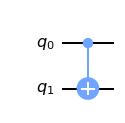

In [13]:
qc = QuantumCircuit(2)
qc.cnot(0,1)
qc.draw('mpl')

Donde `q0` es el bit de control y `q1` es el bit objetivo.

Y esta compuerta está representada por la siguiente matriz:

$$\text{CNOT} =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}
$$

realmente no utilizaremos esta matriz, pero es bueno conocerla.

Podemos visualizar a la CNOT de la siguiente forma:

![](https://qiskit.org/textbook/ch-states/images/cnot_xor.svg)

Y la podemos implementar de la siguiente forma con `cnot` o `cx`:

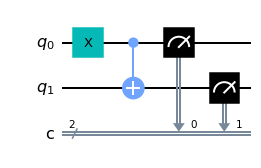

In [14]:
qc = QuantumCircuit(2,2)
### Codifica las entradas ##
qc.x(0)
###########################
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

Así que podríamos describir su comportamiento en la siguiente tabla:

<div>
<img src="https://i.imgur.com/kbcj6NX.png" width="500"/>
</div>

Vamos a ver la implementación del medio sumador.

* Queremos 2 bits para operar y 2 qubits para leer.
* Usaremos solo 2 bits clásicos ya que vamos a medir una cadena de 2 bits.
* Usaremos 2 CNOTs ya que queremos llevar el resultado de las sumas a 2 qubits distintos (y no sobrescribir), por lo que aplicaremos 1 CNOT respecto a cada qubit de lectura.

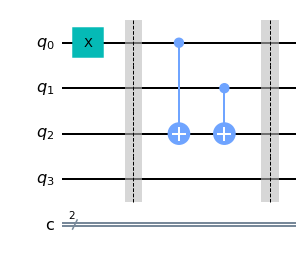

In [15]:
# 4 qubits y 2 clásicos para leer el resultado
qc_ha = QuantumCircuit(4,2)

# Codificamos entradas
qc_ha.x(0)

# Dividimos con una barrera en todos los bits
qc_ha.barrier() 

# CNOTs para sumar, invertimos los control y target en cada uno 
qc_ha.cx(0,2)
qc_ha.cx(1,2)

# Dividimos con una barrera en todos los bits
qc_ha.barrier() 

### Dibujamos ###
qc_ha.draw('mpl')

Es decir, tenemos nuestras entradas `q0` y `q1`, y el resultado de sumar estás irá a parar al bit menos significativo de lectura (`q2`) para los casos de 0+1 y 1+0. Hasta aquí todo bien, pero aún necesitamos el bit de acarreo para el caso 1+1 donde requerimos del siguiente bit más significativo de lectura `q3`. Así que tenemos que implementarlo.

Pensemo en el proceso:

* Si `q0` está en 1 y `q1` en 0 , entonces `q2` está en 1.
* Si `q0` está en 0 y `q1` en 1 , entonces `q2` está en 1.
* Si `q0` está en 1 y `q1` en 1 , entonces `q2` está en 0.

Por lo que por sí mismo el bit `q2` se pone en 0 cuando tiene ambos 1's. 
Así que solo nos vamos a concentrar en colocar nuestro carry en 1 cuando ambos sean 1's. Intuitivamente, sabemos que esto se hace con una AND y una NOT. Y aquí es donde entra en juego la hermana mayor de la **CX**, la **CCX**. Por su nombre **Controlled-Controlled-Not** o más conocida como **Compuerta Toffoli**.

Representada como:

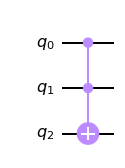

In [16]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

donde `q0` y `q1` son los bits de control y `q2` el bit objetivo.

Con la siguiente matriz:

$$\text{CCX} =
\begin{bmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Es exactamente el mismo funcionamiento que en la **CNOT** solo que ahora tendremos **2 bits de control**. Es decir, es una ompuerta de 3-qubits en donde tenemos 2 qubits de control y 1 objetivo. Si los 2 qubits de control están en 1, aplica la compuerta X. De lo contrario, no hace nada.

Podemos imaginar esta compuerta como una AND en los qubits 1 y 2 seguida de una NOT hacía el qubits 3.

Se implementa con el comando `.ccx`.

La agregamos a nuestro circuito anterior del medio sumador para completarlo. Agregamos la Toffoli al qubit #3 ya que es nuestro carry:

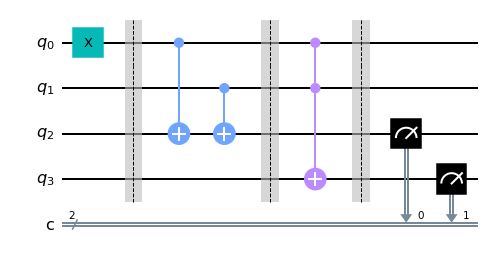

In [17]:
# 4 qubits y 2 clásicos para leer el resultado
qc_ha = QuantumCircuit(4,2)


# Codificamos entradas
qc_ha.x(0)
# Dividimos con una barrera en todos los bits
qc_ha.barrier() 


# CNOTs para sumar, invertimos los control y target en cada uno 
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# Dividimos con una barrera en todos los bits
qc_ha.barrier() 

### Toffoli ###
qc_ha.ccx(0,1,3) 
# Dividimos con una barrera en todos los bits
qc_ha.barrier() 

# Esta es otra forma de medir
# Primero le pasamos los qubits a medir
# y luego los bits clásicos donde se miden cada uno
qc_ha.measure([2,3],[0,1])
              
### Dibujamos ###
qc_ha.draw('mpl')

Vamos a revisar el resultado:

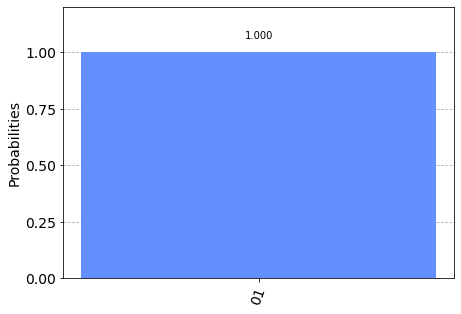

In [18]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

---

## 1.2 Representando los estados de nuestros Qubits